So I wanted to learn how I could do Fraud Detection in Machine Learning. I downloaded the Credit Card Fraud dataset from Kaggle and begun my journey! Let us see how this goes!

<h3>So the first step is always importing the necessary libraries!</h3><p>Remember that this list is always growing as you try new techniques!</p>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler

So we read in the data and just have a cursory look at all of the data

In [8]:
fraud_df=pd.read_csv('creditcard.csv')#We now use Pandas to read the csv(Comma Separated Value) file

In [9]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


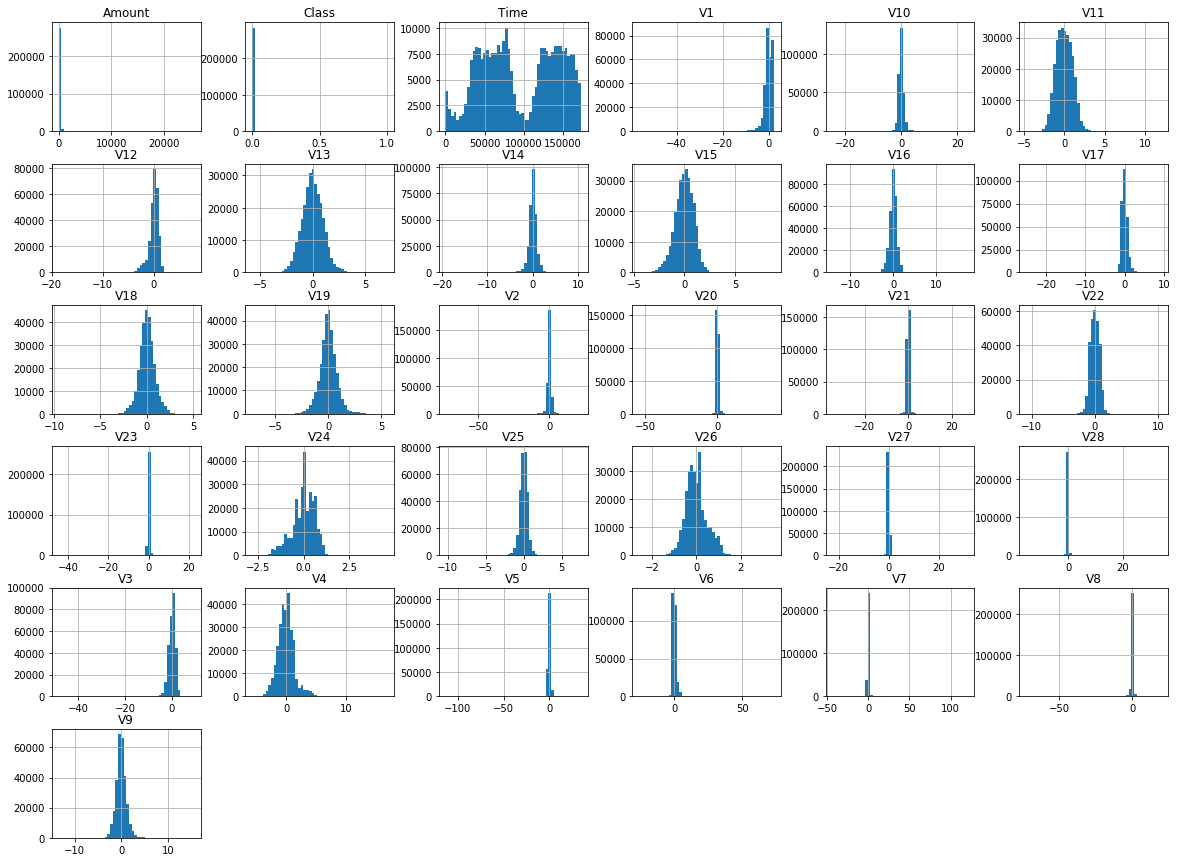

In [11]:
fraud_df.hist(bins=50, figsize=(20,15))
plt.show()

The values:  0    284315
1       492
Name: Class, dtype: int64


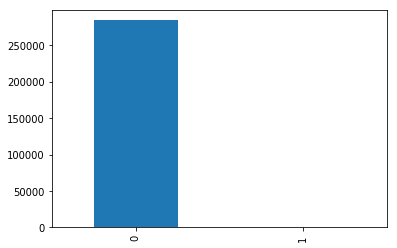

In [12]:
values=fraud_df.Class.value_counts()
print('The values: ', values)
values.plot(kind='bar')
plt.show()

Oh my it looks like we have an imbalanced dataset! A good way to deal with this is to divide the dataset into the different groups or stratas(we will get the indices in the dataset) and then sample using these indexes

In [13]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [14]:
for train_index, test_index in split.split(fraud_df, fraud_df['Class']):
    strat_train_set=fraud_df.loc[train_index]
    strat_test_set=fraud_df.loc[test_index]

In [15]:
strat_train_set.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [16]:
strat_test_set.Class.value_counts()

0    56864
1       98
Name: Class, dtype: int64

So after we have created a train and test set, let us separate them intro features(x) and labels(y)

In [17]:
x_train=strat_train_set.drop('Class', axis=1)
y_train=strat_train_set['Class'].copy()

In [ ]:
x_test=strat_test_set.drop('Class', axis=1)
y_test=strat_test_set['Class'].copy()

Okay so now I want to see how well our model performs on the data before it is scaled

In [13]:
knn_clf=KNeighborsClassifier(n_neighbors=5, n_jobs=16)
knn_clf.fit(x_train, y_train)
print('Untidy Model created')

Untidy Model created


In [14]:
train_score=knn_clf.score(x_train, y_train)
test_score=knn_clf.score(x_test, y_test)
print('Train Score: ', train_score)
print('Test Score: ', test_score)

Train Score:  0.9984463121859158
Test Score:  0.9983322214809873


Oh My! Really!? What a great score! To be sure, let us take a closer look at our models predictions by calculating precision, recall and f1-score. Fortunately for us, Sci-Kit Learn has a library to help us with this! <b>All we need to do is generate predictions with the model</b> and pass it to the <i>classification_report</i> function...

In [16]:
knn_preds=knn_clf.predict(x_train)

In [17]:
knn_classif_report=classification_report(y_train, knn_preds)
print(knn_classif_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.10      0.18       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      0.55      0.59    227845
weighted avg       1.00      1.00      1.00    227845



Aha! We can now see the issue! We have a 100% precision and 10% recall. It seems that our model was unable to correctly classify 90% Fraudulent (1) transactions! This is a bit of an issue! 

Let us now try using the RandomForestClassifier! I do enjoy using the <b>default hyperparameters</b> first and then using <b>GridSearch</b> to find the best hyperparameter values!

In [18]:
forest_clf=RandomForestClassifier()
forest_clf.fit(x_train, y_train)

/home/god/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Okay so we won't be fooled by this again! Let us move on to the precision and recall scores...

In [27]:
print('Train Score: ',forest_clf.score(x_train,y_train))
print('Test Score: ',forest_clf.score(x_test,y_test))

Train Score:  0.9999078320788255
Test Score:  0.9995259997893332


In [24]:
forest_train_predictions=forest_clf.predict(x_train)

In [25]:
forest_train_classification_report=classification_report(y_train, forest_train_predictions)
print(forest_train_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.95      0.97       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      0.97      0.99    227845
weighted avg       1.00      1.00      1.00    227845



Oh MY!!! Our RandomForestClassifier was able to do quite well on the training set! Let us move on to the test set!

In [26]:
forest_test_predicitons=forest_clf.predict(x_test)
forest_test_classification_report=classification_report(y_test, forest_test_predicitons)
print(forest_test_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.77      0.85        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



We can already see an improvement! But let us see if tuning the hyperparameters a bit won't give us better scores!

In [30]:
forest_params=[{'n_estimators':[10,15,20,25,30], 'max_depth':[None,10,20,30,40,50], 'bootstrap':[True, False]}]
forest_grid_search=GridSearchCV(forest_clf, forest_params, cv=5, scoring='accuracy')
print('Grid Search Created!')
forest_grid_search.fit(x_train, y_train)
print('We have found the best hyperparameters based on the tested parameter values!')

Grid Search Created!
We have found the best hyperparameters based on the tested parameter values!


In [31]:
forest_grid_search.best_params_

{'bootstrap': False, 'max_depth': 40, 'n_estimators': 30}

In [32]:
forest_grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
best_forest=forest_grid_search.best_estimator_

Okay let us test this model out!!!

In [34]:
best_test_preds=best_forest.predict(x_test)

In [35]:
best_forest_test_classification_report=classification_report(y_test, best_test_preds)
print(best_forest_test_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Oh my oh my! Not bad at all! All of this with just a little testing!

The GridSearch does take a few hours to run! Let us save our model for reuse. We can use Sci-Kit Learn's <i>joblib</i> library for this!

In [ ]:
joblib.dump(best_forest, 'best_forest_model.pkl')

In [15]:
model=joblib.load('best_forest_model.pkl')

Okay Sweet! Let us see if our model may perform better on scaled data

In [62]:
scaler=MinMaxScaler().fit(x_train.astype(np.float64))

In [63]:
x_standardized=scaler.transform(x_train)

In [64]:
x_test_std=scaler.transform(x_test)

In [65]:
x_standardized[0]

array([9.37074633e-01, 9.91417822e-01, 7.59318108e-01, 8.13931163e-01,
       2.22600700e-01, 7.75833248e-01, 3.03486747e-01, 2.56341254e-01,
       7.97612815e-01, 5.11242340e-01, 5.05465377e-01, 2.78522632e-01,
       7.23425106e-01, 4.53072671e-01, 6.43815319e-01, 4.35656961e-01,
       4.60562381e-01, 7.08882459e-01, 6.63054061e-01, 5.28887281e-01,
       5.78833921e-01, 5.62707819e-01, 5.23911073e-01, 6.70006406e-01,
       4.75343419e-01, 6.07657978e-01, 3.61921083e-01, 4.17944025e-01,
       3.12469458e-01, 2.84922907e-04])

I just copied the output from GridSearch's <i>best_estimator_ </i>  function!

In [57]:
test_model=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
test_model.fit(x_standardized, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
new_preds=test_model.predict(x_standardized)

In [70]:
new_classification_report=classification_report(y_train, new_preds)
print(new_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Oh my we seem to have Perfect scores! Let us move on to the test set!

In [73]:
new_test_preds=test_model.predict(x_test_std)
new_test_classification_report=classification_report(y_test, new_test_preds)
print(new_test_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



As you can see we did get a 2% increase in recall! Not bad at all!

<hr>

Okay so this is my first attempt using t-distributed stochastic neighbor embedding(t-sne) for dimensionality reduction and visualization. I have followed the tutorial in the first reference (1.).  

I initially tried using to visualize the entire dataset, but I do not have the resources for that right now. So I did learn to use samples instead! Have a look...

In [105]:
df_not_fraud_sample= fraud_df[fraud_df.Class == 0].sample(1000)
df_fraud_sample= fraud_df[fraud_df.Class == 1].sample(1000, replace=True)

In [106]:
print(df_not_fraud_sample.shape)
print(df_fraud_sample.shape)

(1000, 31)
(1000, 31)


In [107]:
df_sample=pd.concat([df_not_fraud_sample, df_fraud_sample], axis=0)

I also have learned that scaling the data (<i>Standardization</i> or subtracting the mean and dividing by the standard deviation) before displaying it may be extremely important. Why? Well most data are on different scales and if we ignore this factor then we may get the different data overlapping one another even though they may be entirely different. Try plotting the data before and after scaling to see for yourself!

In [108]:
std_scaler=StandardScaler()
df4_scaled=std_scaler.fit_transform(df_sample.astype(np.float64))

In [109]:
y=df_sample.Class.values

In [110]:
tsne=TSNE(n_components=2, random_state=0)
x_test_2d=tsne.fit_transform(df4_scaled)

0
1


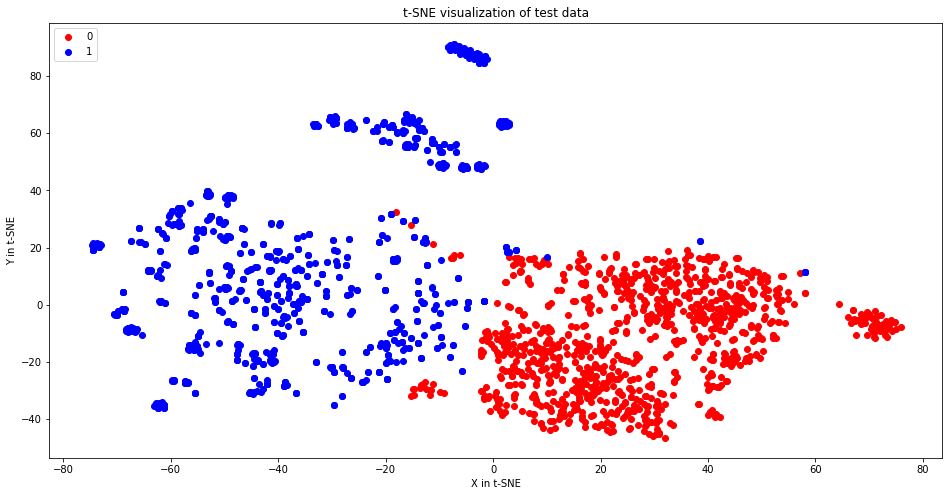

In [112]:
color_map = {0:'red', 1:'blue'}
plt.figure(figsize=(16,8))
for idx, cl in enumerate(np.unique(y)):
    print(cl)
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

Here we have it! My first attempt at visualizing using T-sne. Not bad hey! Give it a try!

<h2>What Have I learned on This Project?</h2>
<ul>
    <li>I learned much more about the K-Nearest Neighbors algorithm and how it works!</li>
    <li>Initially I wanted to try using Bayesian Networks and Self-Organising Maps to solve this problem.
        <b>However</b>, there are many simpler approaches and I see that I should not always 'jump-the-gun' and try
    to unnecessary approaches to solve a simple problem</li>
    <li>Using Grid Search to find optimal hyperparameters. Even though this did take a few hours to run, I did end            up getting a better model. So the best approach is always use the defaults and then tune the model after!</li>
    <li>Also, to not trust the accuracy metric alone! Especially on skewed or imbalanced datasets! The accuracy metric uses the average of the entire dataset so it drowns the errors of the minory class with the successes of the majority class!</li>
    <li>Saving your model does save so much time when you come back to code!</li>
    <li>So another important thing to remember is that when your dataset is too large and you do not have enough resources to work with it, <b>always sample the data!</b> Also be sure to scale the data so that the plotted data does not overlap one another!</li>


</ul>

<h2>References:</h2>
<ol>
    <li>https://www.kaggle.com/isiablis/tensor-flow-on-credit-card-clients-data-82-acc</li>
    <li>Aurlien Gron. 2017. Hands-On Machine Learning with Scikit-Learn and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems (1st ed.). O'Reilly Media, Inc</li>



</ol>